
# Ejercicio: Regresi√≥n Lineal con datos agr√≠colas

En este notebook aplicar√°s **Regresi√≥n Lineal** para predecir la variable `Producci√≥n_Ton` a partir de otras variables agr√≠colas y econ√≥micas.

üìÇ **Base de datos**: `datos_regresion_lineal_agricola.xlsx`  
- Hoja **Datos**: registros.  
- Hoja **Diccionario**: descripci√≥n de variables.

---

## Objetivo del ejercicio
- Construir un modelo de **Regresi√≥n Lineal** con scikit-learn.  
- Aplicar buenas pr√°cticas de preprocesamiento, entrenamiento, evaluaci√≥n y visualizaci√≥n.  
- Interpretar resultados en el contexto agr√≠cola.

**Nota**: este notebook contiene consignas y celdas vac√≠as para que los alumnos lo completen.


## 1) Preparaci√≥n de entorno

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2) Cargar y explorar los datos

In [16]:
# Ruta al archivo Excel generado previamente
file_path = "ejercicio_1_datos_regresion_lineal_agricola.xlsx"

# Cargar datos de la hoja 'Datos'
df = pd.read_excel(file_path, sheet_name="Datos")

# Mostrar primeras filas
df.head()

A√±o  Mes Regi√≥n  Cultivo  Superficie_Ha  Producci√≥n_Ton  Precio_Ton  \
0  2023    1  Norte     Ma√≠z            122             749      316.95   
1  2023    1  Norte     Soja            141             422      273.40   
2  2023    1  Norte    Trigo            107             328      311.12   
3  2023    1  Norte  Manzana            363            2874      274.87   
4  2023    1  Norte   Tomate            211            1446      131.99   

   Costos_Insumos   Ingresos   Utilidad  
0           12541  237319.70  224778.70  
1            2574  115405.98  112831.98  
2            2543  101962.95   99419.95  
3            5428  789881.63  784453.63  
4            2363  190802.69  188439.69

In [17]:
# Informaci√≥n general de las columnas
df.info()

# Estad√≠sticas descriptivas
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   A√±o             480 non-null    int64  
 1   Mes             480 non-null    int64  
 2   Regi√≥n          480 non-null    object 
 3   Cultivo         480 non-null    object 
 4   Superficie_Ha   480 non-null    int64  
 5   Producci√≥n_Ton  480 non-null    int64  
 6   Precio_Ton      480 non-null    float64
 7   Costos_Insumos  480 non-null    int64  
 8   Ingresos        480 non-null    float64
 9   Utilidad        480 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 37.6+ KB


count unique    top freq           mean            std  \
A√±o             480.0    NaN    NaN  NaN         2023.5       0.500522   
Mes             480.0    NaN    NaN  NaN            6.5       3.455654   
Regi√≥n            480      4  Norte  120            NaN            NaN   
Cultivo           480      5   Ma√≠z   96            NaN            NaN   
Superficie_Ha   480.0    NaN    NaN  NaN     253.041667     141.376776   
Producci√≥n_Ton  480.0    NaN    NaN  NaN     1613.71875     1157.53085   
Precio_Ton      480.0    NaN    NaN  NaN     254.586896       74.45154   
Costos_Insumos  480.0    NaN    NaN  NaN    10438.29375    5545.255615   
Ingresos        480.0    NaN    NaN  NaN  379991.904521  263489.847762   
Utilidad        480.0    NaN    NaN  NaN  369553.610771  263795.833364   

                     min         25%         50%          75%         max  
A√±o               2023.0      2023.0      2023.5       2024.0      2024.0  
Mes                  1.0        3.75         6.5         9.25        12.0  
Regi√≥n               NaN         NaN         NaN          NaN         NaN  
Cultivo              NaN         NaN         NaN          NaN         NaN  
Superficie_Ha       20.0       137.0       245.0       378.25       499.0  
Producci√≥n_Ton      48.0      677.25      1314.5       2412.5      5403.0  
Precio_Ton        100.09    193.8125     265.365       312.11      397.48  
Costos_Insumos    1543.0      5399.5     10356.5     15137.25     19957.0  
Ingresos        17546.34   179413.99  334503.955    515130.73  1451367.44  
Utilidad          240.34  167052.425    322863.2  504072.8175  1442403.44

## 3) An√°lisis exploratorio (EDA)

In [18]:

# Calcula estad√≠sticas agrupadas por 'Cultivo' y 'Regi√≥n' (ejemplo: media de Producci√≥n_Ton)
# Estad√≠sticas agrupadas por cultivo y regi√≥n
group_stats = df.groupby(["Cultivo", "Regi√≥n"]).agg({
    "Producci√≥n_Ton": ["mean", "std", "min", "max"],
    "Superficie_Ha": ["mean", "std"],
    "Precio_Ton": ["mean"]
}).round(2)
group_stats


Producci√≥n_Ton                     Superficie_Ha          \
                          mean      std  min   max          mean     std   
Cultivo Regi√≥n                                                             
Manzana Austral        2200.25  1522.48  382  5150        239.88  164.65   
        Centro         2652.50  1279.63  307  5403        283.29  135.27   
        Norte          2360.12  1441.66  219  5156        263.38  155.69   
        Sur            2350.75  1194.25  232  4516        230.04  100.29   
Ma√≠z    Austral        1645.38  1016.75  224  3596        232.92  142.61   
        Centro         1697.88  1112.77  183  3480        225.42  145.25   
        Norte          1648.50  1045.71  163  3723        235.46  145.42   
        Sur            1810.17   958.10  451  3614        230.79  124.50   
Soja    Austral         702.17   366.33  110  1580        236.08  133.31   
        Centro          699.17   471.35   79  2024        219.88  130.06   
        Norte           849.79   479.63   64  1549        267.79  146.04   
        Sur            1052.04   580.23   48  2113        294.08  152.00   
Tomate  Austral        2257.38  1113.10  184  3918        290.04  145.24   
        Centro         2071.50  1380.71  209  4738        257.96  163.15   
        Norte          1778.83  1070.78  253  3579        234.79  141.01   
        Sur            2302.17  1304.30  219  4369        271.12  148.56   
Trigo   Austral         991.79   515.79   72  1981        260.42  142.30   
        Centro         1052.50   663.75  131  2116        246.12  147.64   
        Norte           981.62   453.84  328  1726        260.83  124.90   
        Sur            1169.88   665.07  134  2398        280.54  147.11   

                Precio_Ton  
                      mean  
Cultivo Regi√≥n              
Manzana Austral     215.31  
        Centro      223.98  
        Norte       230.65  
        Sur         230.55  
Ma√≠z    Austral     274.05  
        Centro      267.95  
        Norte       273.94  
        Sur         260.95  
Soja    Austral     323.45  
        Centro      337.10  
        Norte       317.02  
        Sur         346.92  
Tomate  Austral     141.95  
        Centro      149.35  
        Norte       146.76  
        Sur         145.91  
Trigo   Austral     286.31  
        Centro      306.33  
        Norte       314.82  
        Sur         298.44

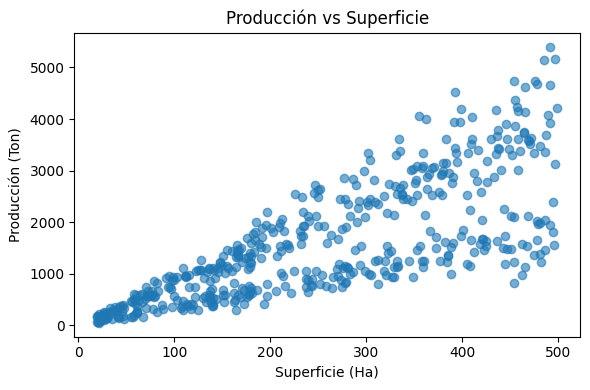

In [19]:

# Realiza al menos un gr√°fico exploratorio (ej: Producci√≥n_Ton vs Superficie_Ha)
# Dispersi√≥n Producci√≥n_Ton vs Superficie_Ha
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["Superficie_Ha"], df["Producci√≥n_Ton"], alpha=0.6)
plt.xlabel("Superficie (Ha)")
plt.ylabel("Producci√≥n (Ton)")
plt.title("Producci√≥n vs Superficie")
plt.tight_layout()
plt.show()


## 4) Definici√≥n de variables para el modelo

In [20]:

# Define X con variables: A√±o, Mes, Regi√≥n, Cultivo, Superficie_Ha, Precio_Ton, Costos_Insumos
# Define y como Producci√≥n_Ton
feature_cols = ["A√±o", "Mes", "Regi√≥n", "Cultivo", "Superficie_Ha", "Precio_Ton", "Costos_Insumos"]
target_col = "Producci√≥n_Ton"

X = df[feature_cols].copy()
y = df[target_col].copy()


## 5) Divisi√≥n de datos en Train/Test

In [21]:

# Separa en entrenamiento y prueba (80/20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 6) Preprocesamiento

In [22]:

# Crea transformadores para variables num√©ricas (imputer + scaler) y categ√≥ricas (imputer + onehot)
# Une ambos en un ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_features = ["A√±o", "Mes", "Superficie_Ha", "Precio_Ton", "Costos_Insumos"]
categorical_features = ["Regi√≥n", "Cultivo"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


## 7) Entrenamiento del modelo

In [23]:

# Construye un Pipeline con preprocesamiento + LinearRegression
# Ajusta el modelo con .fit()
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## 8) Evaluaci√≥n

In [24]:

# Calcula m√©tricas: MAE, RMSE, R2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = float(np.sqrt(mse))
r2 = r2_score(y_test, y_pred)


In [25]:

# Imprime las m√©tricas con formato legible
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2  : {r2:.3f}")


MAE : 305.79
RMSE: 392.03
R2  : 0.877


## 9) Gr√°fico Predicho vs Real

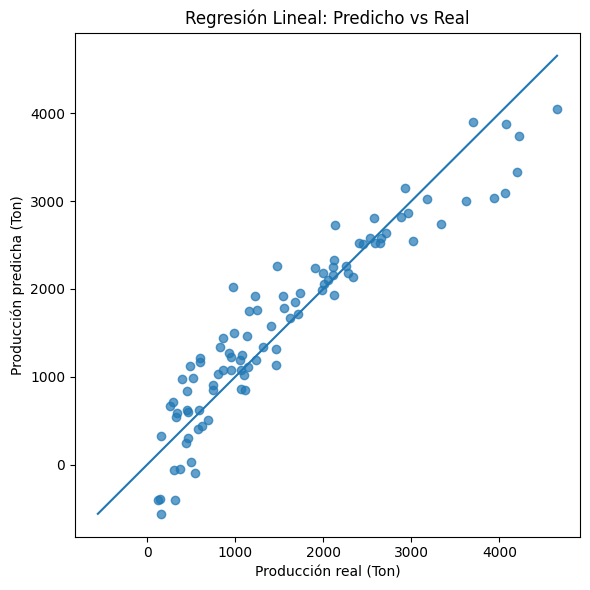

In [26]:

# Genera gr√°fico de dispersi√≥n de y_test vs y_pred y a√±ade l√≠nea diagonal
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel("Producci√≥n real (Ton)")
plt.ylabel("Producci√≥n predicha (Ton)")
plt.title("Regresi√≥n Lineal: Predicho vs Real")
plt.tight_layout()
plt.show()


## 10) Diagn√≥stico de residuos (opcional)

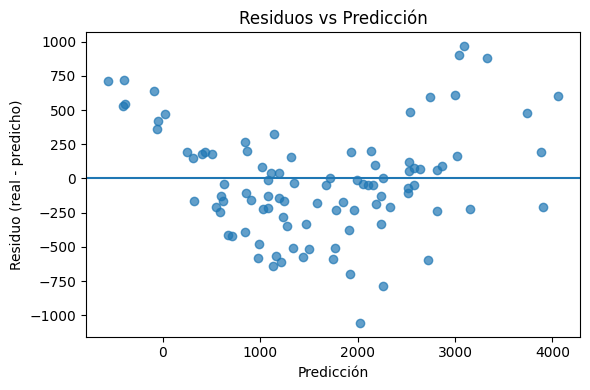

In [27]:

# Calcula residuos (y_test - y_pred) y graf√≠calos contra y_pred
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0)
plt.xlabel("Predicci√≥n")
plt.ylabel("Residuo (real - predicho)")
plt.title("Residuos vs Predicci√≥n")
plt.tight_layout()
plt.show()


## 11) Interpretaci√≥n de coeficientes (opcional)

In [28]:

# Extrae coeficientes del modelo lineal y relaci√≥nalos con las variables
# Recuperar nombres de columnas tras One-Hot
ohe = model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
cat_names = list(ohe.get_feature_names_out(["Regi√≥n", "Cultivo"]))
num_names = ["A√±o", "Mes", "Superficie_Ha", "Precio_Ton", "Costos_Insumos"]
feature_names = num_names + cat_names

linreg = model.named_steps["model"]
coef_series = pd.Series(linreg.coef_, index=feature_names).sort_values(ascending=False)

# Mostrar top positivos y negativos
top_pos = coef_series.head(10)
top_neg = coef_series.tail(10)

print("Top 10 coeficientes positivos:\n")
print(top_pos)

print("\nTop 10 coeficientes negativos:\n")
print(top_neg)


Top 10 coeficientes positivos:

Superficie_Ha      891.532274
Cultivo_Manzana    795.561000
Cultivo_Tomate     451.388273
Cultivo_Ma√≠z       230.897835
Regi√≥n_Centro       74.383921
Mes                 52.206461
Regi√≥n_Sur          40.707735
Precio_Ton          16.788792
A√±o                 12.034002
Costos_Insumos       1.048593
dtype: float64

Top 10 coeficientes negativos:

Regi√≥n_Centro      74.383921
Mes                52.206461
Regi√≥n_Sur         40.707735
Precio_Ton         16.788792
A√±o                12.034002
Costos_Insumos      1.048593
Regi√≥n_Austral    -26.661371
Regi√≥n_Norte      -88.430285
Cultivo_Trigo    -647.698814
Cultivo_Soja     -830.148295
dtype: float64


## 12) Conclusiones


Escribe una interpretaci√≥n en 5‚Äì8 l√≠neas sobre:
- Qu√© tan bien funciona el modelo (seg√∫n m√©tricas y gr√°ficos).
- Limitaciones observadas.
- Posibles mejoras (variables derivadas, otros algoritmos).
